In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm_notebook as tqdm

gold = 8.*np.array([1,1/((1+np.sqrt(5))/2)])

# This function makes the plots look prettier on GitHub. 
### to do: figure out how to make this automatic.

def fix_boxplot(parts):
    for m in parts['fliers']:
        m.set_markersize(12)
        m.set_markeredgewidth(1)
    for b in parts['boxes']:
        b.set_linewidth(2)
    for w in parts['whiskers']:
        w.set_linewidth(2)
    for c in parts['caps']:
        c.set_linewidth(2)
    for m in parts['medians']:
        m.set_linewidth(2)
    for m in parts['means']:
        m.set_linewidth(2)
        m.set_color('g')
        m.set_markerfacecolor('g')

# Problem 3.6

This problem is written as though it's specific to Minitab, but this is actually a general issue with boxplots. I have re-structured it for python here.

First, we generate three sets of data, with a different number of observations in each.

In [2]:
Group1 = pd.concat([pd.Series(['Group 1',]*250,name='Group'),pd.Series(np.random.normal(size=250),name='Data')],axis=1)
Group2 = pd.concat([pd.Series(['Group 2',]*1000,name='Group'),pd.Series(np.random.normal(size=1000),name='Data')],axis=1)
Group3 = pd.concat([pd.Series(['Group 3',]*4000,name='Group'),pd.Series(np.random.normal(size=4000),name='Data')],axis=1)

stack = Group1.append(Group2).append(Group3)

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 <a list of 9 Text yticklabel objects>)

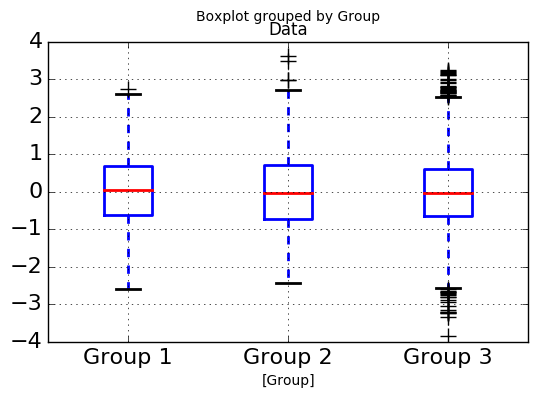

In [3]:
parts = stack.boxplot(by='Group',return_type='dict',fontsize=16)
fix_boxplot(parts['Data'])
plt.yticks(fontsize=16)

### Part A
What we notice about the boxplot is that despite each distribution being the same, there are more fliers as we increase the sample size.

### Part B
The extra fliers make us believe that the tails are heavier in Group 3, where there are so many fliers.

### Part C
This is misleading because the distributions are identical here; the fact that we have a larger sample size means we are more likely to get extreme values. What the plot does not show you is how many points go into the box and whiskers, and so not knowing anything about sample sizes we would draw a wrong conclusion about these distributions.

### Part D

(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 <a list of 9 Text yticklabel objects>)

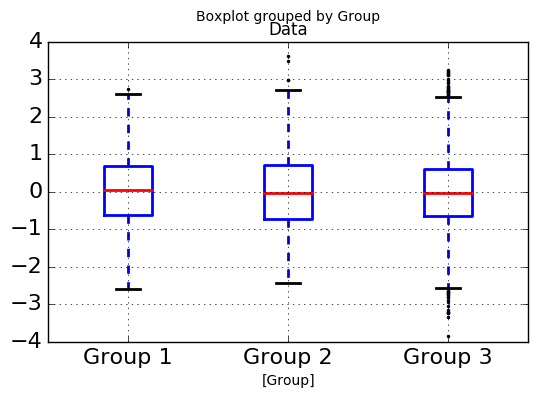

In [4]:
parts = stack.boxplot(by='Group',return_type='dict',fontsize=16,sym='.')
fix_boxplot(parts['Data'])
for m in parts['Data']['fliers']:
    m.set_markersize(3)
plt.yticks(fontsize=16)

### Part E
Changing the symbol weight for the outliers definitely helps the feeling, but the temptation to read more into it is still there. This issue needs to be remembered so that we aren't mislead by these features.